In today's highly competitive market, retaining customers in paramount for the survival of any business. The ever-evolving industry, marked by rapid technological advancements and an abundance of service providers, makes customer retention an ongoing challenge. As such, telecom companies are increasingly turning to data-driven approaches to understand and predict customer behavior, particularly in terms of churn.
In this context, I am building this predictive model to calculate customer churn in the telecom industry. Using historic data, behavioural patterns and the demographic information, this model aims to give insights into factors which influence customer churn.  This is enable the telecom industry to allocate their resources on factors which matter the most, inproving customer satisfaction and reducing customer churn.

The dataset used is an IBM dataset which has been obtained from kaggle. Link for which is found below.
https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

Limitations:
1) No data on date: We lack specific date information and only possess data pertaining to the state of California for the third quarter (Q3). This limitation confines our model's analysis to this particular quarter, thereby restricting our ability to examine cyclical patterns or conduct time series analysis.
2) Insufficient Data: The dataset comprises approximately 7,000 data points, which falls short of providing an adequate sample size for models such as Random Forests or other complex models.

We first import the basic libraries required for importing the data.

In [1]:
#For data manipulation
import numpy as np
import pandas as pd
#For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
#For data analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import tree


We import the data convert it to a dataframme. We then  get some initial insights. 

In [2]:
# Load the data
raw_data = pd.read_excel('Telco_customer_churn.xlsx')
raw_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,TotalCharges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [3]:
#Checking the number of rows and columns in the dataset.
print(raw_data.shape)

#Getting statistical information about the data
raw_data.describe()

(7043, 33)


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,TotalCharges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2282.088109,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2265.938724,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.675000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1396.250000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3790.400000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [4]:
#Understanding the data type of each variable.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

The next step will be looking for the missing data.

In [5]:
# Check for missing values
raw_data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
TotalCharges            0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Fortunately, there are no missing values present in the dataset except for "Churn Reason". This is because it is applicable to only who have churned. 

While most columns are self explained,
1) CustomerID is the primary key
2) Churn lable has two values, Yes and No. Yes = the customer has left the company this quarter.
3) Churn Score: 1(Yes) = customer has churned 

Let us first understand the column "Churn Reason". The best way to understand it would be to plot the variables into a bar chart

C:\Users\Akshay Mody\AppData\Local\Temp\ipykernel_15404\305312088.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar = sns.barplot(y=raw_data['Churn Reason'], x=raw_data.index,orient="h",ci=None)


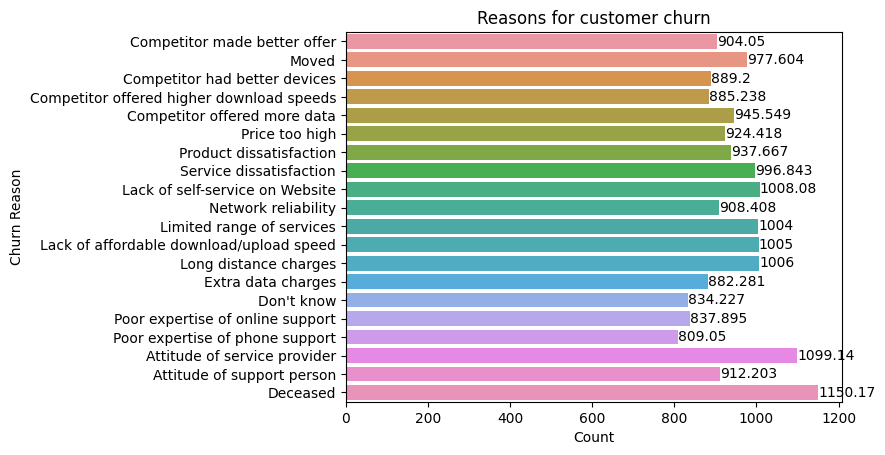

In [6]:
#Creating the bar graph
bar = sns.barplot(y=raw_data['Churn Reason'], x=raw_data.index,orient="h",ci=None)
plt.title('Reasons for customer churn')
#X-axis label
plt.xlabel('Count')
# Setting y-axis label
plt.ylabel('Churn Reason')
for i in bar.containers:
    bar.bar_label(i,)
plt.show()

The above barplot gives a breakdown the reason for customer churn. 

We then try to identify the variables which have also impact customer churn.

In [7]:
#We idetify the unqiue values
raw_data.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
TotalCharges         6540
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

As seen above, count, country and state only have a singluar value for all the datapoints. Since they serve no purpose in building the model, we remove them.
Also, instead of using lat long, latitude and logitude, we can use zip code to get a more generlized location. So, we can remove them.   

We then visualize the remaining columns to better understand their breakup which further helps us understand the dataset.

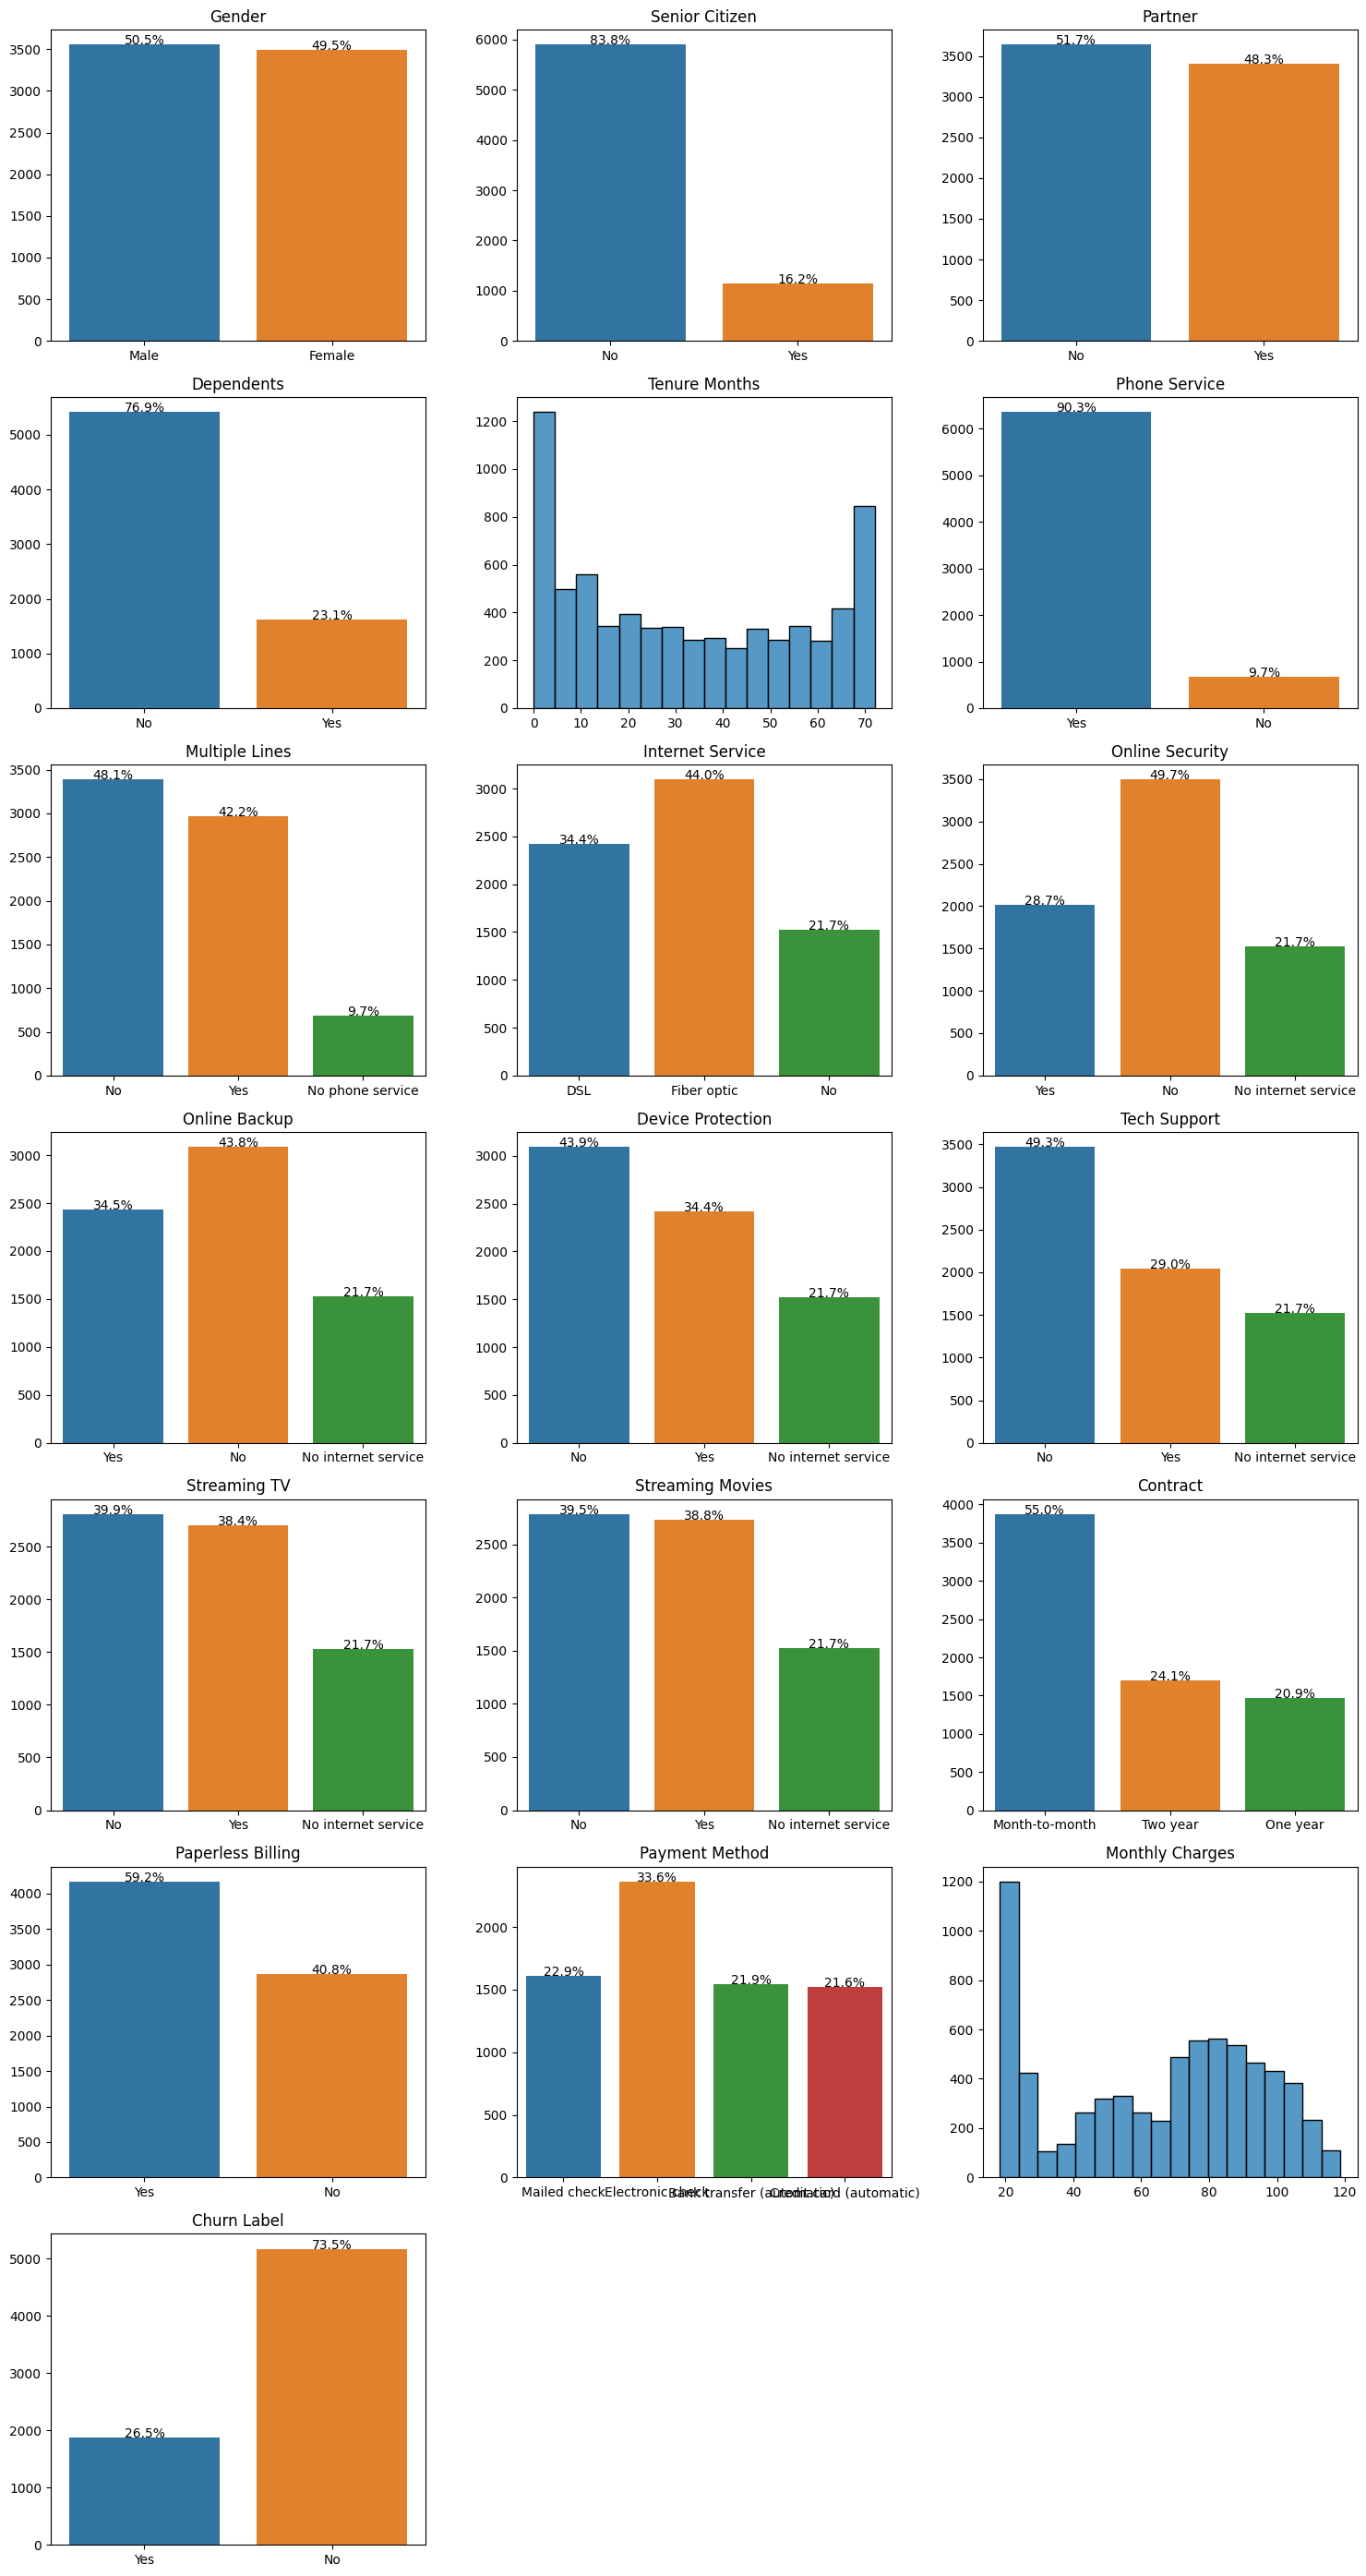

In [8]:
#Dropping the columns which are not relevant
df = raw_data.drop(['CustomerID',"City","Churn Value","TotalCharges",'Zip Code','Count','Country', 'State','Lat Long','Latitude','Longitude','Churn Reason','Churn Score','CLTV'], axis=1)

# Define the number of columns you want to display per row 
columns_per_row = 3

# Calculate the total number of columns in the DataFrame
num_columns = len(df.columns)

# Calculate the number of rows required to display all columns
num_rows = (num_columns + columns_per_row - 1) // columns_per_row

# Create subplots to display the count plots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 4 * num_rows))

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

# Loop through each column and create a count plot or histogram
for i, column in enumerate(df.columns):
    ax = axes[i] if i < num_columns else None
    if ax is not None:
        # Choose the appropriate plot type based on the data type of the column
        if df[column].dtype == 'object':
            sns.countplot(data=df, x=column, ax=ax)
            
            # Add percentages to the data labels
            total_count = len(df[column])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()
                ax.annotate(percentage, (x, y), ha='center')
        else:
            sns.histplot(data=df, x=column, ax=ax)
        ax.set_title(column)
        ax.set_xlabel('')
        ax.set_ylabel('')

# Remove any empty subplots
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The above visualization shows that the data is divided equally.

Now, to predict the customer churn, we will try out different machine learning techniques

In [9]:
#We create a new dataset which has the relevant variables.
data = raw_data.drop(['Count','Country', 'State','Lat Long','Latitude','Longitude','Churn Label','Churn Reason','Churn Score','CustomerID','Zip Code'], axis=1)
data.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,TotalCharges,Churn Value,CLTV
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


We start with logistic regression.

In [10]:
# Defining the features X and target y
X = data.drop(['Churn Value'], axis=1)
y = data['Churn Value']

# One-hot Encode the categorical variables 
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
# Make predictions
y_pred = logistic_regression.predict(X_test)

c:\Users\Akshay Mody\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


After creating the model, we need to check it's accuracy. The best way is to create a confusion matrix

In [12]:
#Creating a confusion matrix and using classification report from SKlearn
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[899 110]
 [173 227]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1009
           1       0.67      0.57      0.62       400

    accuracy                           0.80      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.79      0.80      0.79      1409



As seen from the matrix above, we get an accuracy of the model is 80% which would be a good indicator. This however does not paint the complete picture. The recall for 1 i.e churn is really low. This indicates that the dataset might be imbalanced. To confirm this, we calculate the churn rate.

In [13]:
# Calculate the churn rate
total_customers = len(raw_data)
churned_customers = raw_data['Churn Value'].sum()
churn_rate = churned_customers / total_customers
print(f'Churn Rate: {churn_rate:.2%}')

Churn Rate: 26.54%


The churn rate is only 26.5%. This indicates the most of the cutomers in the given data have not yet churned, which is creating this imbalance.
To deal with this imbalance, we use SMOTE.

In [14]:
#Using smote to resample the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [15]:
#Creating a new model with the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_re_pred = model.predict(X_test)


c:\Users\Akshay Mody\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
#Checking the accuracy of the resampled data
print(classification_report(y_test, y_re_pred))


              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1009
           1       0.56      0.62      0.59       400

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.76      1409



After resampling the data, the accuracy of the model is reduced to 76%. But the recall has improved.

Next we try to tune the hyper-parameters to try and improve the accuracy of the model.

In [17]:
# Define hyperparameters for tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Selecting the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)



c:\Users\Akshay Mody\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Akshay Mody\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

In [18]:
#Checking the accuracy of the model after hyper-parameter testing.
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1009
           1       0.56      0.63      0.60       400

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.76      1409



Even after tunung the hyper-parameters, the accuracy of the model remains the same.If we had more data, we could have used more advanced regression techniques like random forest.